# Question 3 (part 1): Traditional NLP Models


## Import data & summarize

In [1]:
import pandas
import sklearn.model_selection
import sklearn.feature_extraction
import sklearn.feature_selection
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.metrics
import numpy as np

import os
import re
import requests

In [2]:
with open('Data/classification/classification.txt', 'rt') as f:
    lines = f.readlines()

In [3]:
lines[:10]

['The battery is completely useless to me.\t0\n',
 'What a big waste of time.\t0\n',
 "Don't waste your $$$ on this one.\t0\n",
 'Great sound and service.\t1\n',
 'Really pleased with this product so far.\t1\n',
 'One of my favorite purchases ever.\t1\n',
 'best bluetooth on the market.\t1\n',
 'Authentic leather with nice shine and comfort .I recommend you this case !!\t1\n',
 'I was very excited to get this headset because I thought it was really cute.\t1\n',
 'Do not make the same mistake as me.\t0\n']

In [4]:
xys = [l.split('\t') for l in lines]
xys = [(x, int(y.strip())) for x, y in xys]

In [5]:
xys[:10]

[('The battery is completely useless to me.', 0),
 ('What a big waste of time.', 0),
 ("Don't waste your $$$ on this one.", 0),
 ('Great sound and service.', 1),
 ('Really pleased with this product so far.', 1),
 ('One of my favorite purchases ever.', 1),
 ('best bluetooth on the market.', 1),
 ('Authentic leather with nice shine and comfort .I recommend you this case !!',
  1),
 ('I was very excited to get this headset because I thought it was really cute.',
  1),
 ('Do not make the same mistake as me.', 0)]

In [6]:
import pandas
df = pandas.DataFrame(xys, columns=['content', 'label'])

In [7]:
df.describe()

,label
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


Nice balanced dataset with n=1000 observations.

In [8]:
df.content.str.split(' ').apply(len).describe()

count    1000.000000
mean       10.246000
std         6.687616
min         1.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        30.000000
Name: content, dtype: float64

Longest sentence is ~30 words or tokens. Average is about 10. Shortest is 1.

In [9]:
df[df.content.str.split(' ').apply(len) == 1]

,content,label
233,Disappointed!.,0
521,disappointing.,0
547,WORTHWHILE.,1
647,Excellent!.,1
763,disappointed.,0
955,Incredible!.,1


Looking at those was worthwhile.

## Preprocessing

- lowercase
- replace punctuation, digits, special characters with a single space
- also `_` is supposed to be retained but it never appears.

In [10]:
df.content.str.contains('_').any()

False

In [11]:
def preproc_simple(s):
    s = s.lower()
    # replace non-word characters with single space
    s = re.sub(r'\W', ' ', s)
    # replace digits with single space
    s = re.sub(r'\d', ' ', s)
    # replace multiple whitespace with single space
    return re.sub(r'\s\s+', ' ', s)

df['preproc'] = df.content.apply(preproc_simple)
          

In [12]:
with pandas.option_context('display.max_colwidth', -1):
    display(df[['content', 'preproc']])

,content,preproc
0,The battery is completely useless to me.,the battery is completely useless to me
1,What a big waste of time.,what a big waste of time
2,Don't waste your $$$ on this one.,don t waste your on this one
3,Great sound and service.,great sound and service
4,Really pleased with this product so far.,really pleased with this product so far
...,...,...
995,These are certainly very comfortable and functionality is decent.,these are certainly very comfortable and functionality is decent
996,I usually don't like headbands but this one is very lightweight & doesn't mess up my hair.,i usually don t like headbands but this one is very lightweight doesn t mess up my hair
997,I'm a bit disappointed.,i m a bit disappointed
998,"I have had this phone for over a year now, and I will tell you, its not that great.",i have had this phone for over a year now and i will tell you its not that great


Possibly could just remove `'` without replacing it by a space. Examples like `I'm` and `don't`.

## Dataset dev-test split

Choose 80 / 10 / 10

In [13]:
dev, test = sklearn.model_selection.train_test_split(df, test_size=0.1, random_state=892192, shuffle=True)
dev_train, dev_val = sklearn.model_selection.train_test_split(dev, test_size=1/9, random_state=992052, shuffle=True)

[len(x) for x in [dev_train, dev_val, test]]

[800, 100, 100]

## ML Pipeline

In [14]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer()
# document term matrix for training
X_dtm = vectorizer.fit_transform(dev_train.preproc.to_list()).toarray()

In [15]:
pandas.DataFrame(X_dtm, columns = vectorizer.get_feature_names())

,abhor,ability,able,abound,about,above,absolutely,ac,accept,acceptable,...,wrong,wrongly,year,years,yell,yes,yet,you,your,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Feature selection using chi squared of each example 
kb = sklearn.feature_selection.SelectKBest(score_func=sklearn.feature_selection.chi2,
                                           k=100) \
            .fit(X_dtm, dev_train.label.values)
X_kb = kb.transform(X_dtm)

In [17]:
X_kb.shape

(800, 100)

In [18]:
# chi square scores for selected features, selector takes highest 100 scores 
#. (not sure how it resolves ties!)
kb.scores_[kb.scores_ >= sorted(kb.scores_)[-100]]

array([ 4.44550244, 12.82610229, 10.0481191 ,  4.08080808,  3.92079208,
        3.67249582,  9.18181818,  5.17505084, 14.87391371,  3.8419842 ,
        4.08080808,  4.62126213,  5.49508284,  4.38123812,  3.92079208,
        3.92079208,  6.05220522,  3.92079208,  3.67249582,  4.7333019 ,
        5.1010101 ,  5.58590303,  3.92079208,  5.1010101 ,  5.1010101 ,
        6.12121212,  5.1010101 ,  4.08080808,  5.75793135,  7.34499164,
        8.44991166,  6.05220522, 17.78579676,  6.24162416,  3.92079208,
        7.18545491,  7.34499164,  7.18545491,  3.92079208,  3.92079208,
       24.16294252, 61.43445627,  5.17505084,  8.03683702,  3.72137214,
        6.86138614,  6.12121212,  3.67249582,  3.67249582, 10.08591729,
        5.30587503,  6.12121212,  3.92079208,  3.92079208, 12.74257426,
        4.08080808, 12.53285329, 18.62376238, 53.54241382,  5.58590303,
        4.08080808,  8.3105501 ,  3.71772733,  4.9009901 ,  3.92079208,
        3.72137214,  4.08080808,  3.92079208,  3.72137214, 15.30

In [19]:
model = sklearn.linear_model.LogisticRegression()
model.fit(X_kb, dev_train.label.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

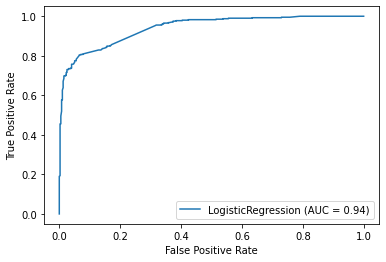

In [20]:
sklearn.metrics.plot_roc_curve(model, X_kb, dev_train.label)

In [21]:
dev_train['predict'] = model.predict_proba(X_kb)[:, 1]
dev_train[['content', 'label', 'predict']]

/opt/conda/envs/earthai/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,content,label,predict
643,My sister has one also and she loves it.,1,0.580034
28,Excellent hands free tool.,1,0.865250
984,fast service.,1,0.550081
537,I really wanted the Plantronics 510 to be the ...,0,0.819934
482,Poor quality.,0,0.133862
...,...,...,...
969,"useless phone, simply deaf.",0,0.243341
111,Was not happy.,0,0.230157
6,best bluetooth on the market.,1,0.808814
559,I can't use this case because the smell is dis...,0,0.396105
